In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/lung-cancer-survey-data/lung cancer survey.csv")

In [7]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
label_encod=LabelEncoder()
df["GENDER"]=label_encod.fit_transform(df["GENDER"])

In [33]:
df["target"]=label_encod.fit_transform(df["LUNG_CANCER"])

In [34]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,target
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1


In [35]:
X=df.drop(columns=["LUNG_CANCER","target"])
Y=df["target"]

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
log_classif=LogisticRegression()
log_classif.fit(X_train,Y_train)
log_classif.score(X_test,Y_test)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.967741935483871

In [38]:
random_classif=RandomForestClassifier()
random_classif.fit(X_train,Y_train)
random_classif.score(X_test,Y_test)

0.967741935483871

In [39]:
y_pred=random_classif.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
Y_test

288    1
9      1
57     1
60     1
25     1
      ..
198    1
195    1
210    1
224    1
158    1
Name: target, Length: 62, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: ylabel='target'>

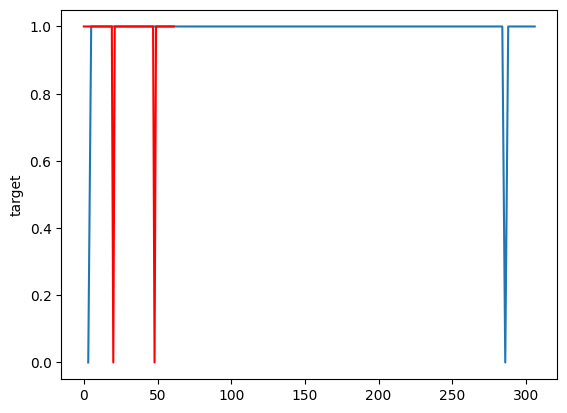

In [41]:
sns.lineplot(Y_test)
sns.lineplot(y_pred,color="red")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Count'>

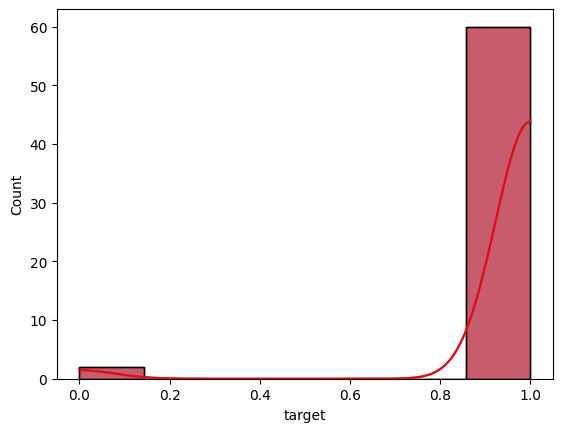

In [44]:
sns.histplot(Y_test,kde=True)
sns.histplot(y_pred,kde=True,color="red")

<Axes: >

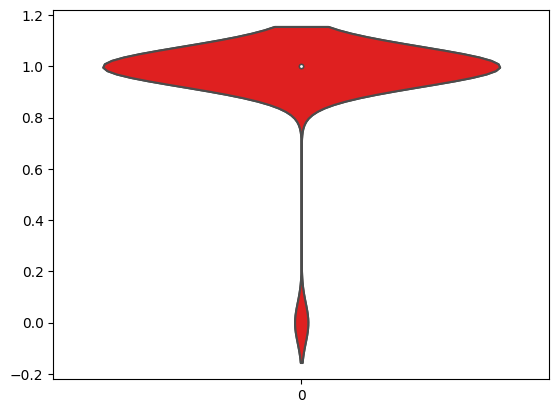

In [49]:
sns.violinplot(np.array(Y_test))
sns.violinplot(np.array(y_pred),color="red")


<Axes: ylabel='target'>

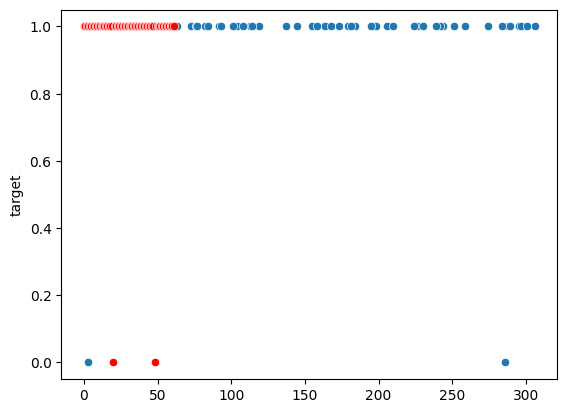

In [51]:
sns.scatterplot(Y_test)
sns.scatterplot(y_pred,color="red")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Density'>

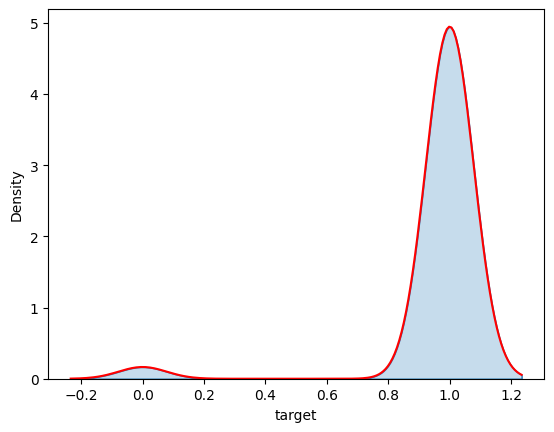

In [54]:
sns.kdeplot(Y_test,fill="shade")
sns.kdeplot(y_pred,color="red")